In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The Sequences to be aligned
sequence_1 = "GCTAGCTAGCTACGTAGCGATCGTACGATGCTAGCTACGATCGTACGT"
sequence_2 = "ACGTAGCTAGCTAGCATCGATCGATCGTACGATCGATGCTAGCTAGC"

In [ ]:
# Defining the constant for calculating the score
match = 1
mismatch = -1
gap = -2

# The constants for the traceback process
# No end needed
left = 1 
up = 2        
diagonal = 3  
path = 10

In [ ]:
def smith_waterman(seq1, seq2):
    rows = len(seq1) + 1
    cols = len(seq2) + 1

    scoring_matrix = np.zeros((rows, cols), dtype=int)
    traceback_matrix = np.zeros((rows, cols), dtype=int)
    
    max_score = 0
    max_pos = (0, 0)
    
    # Fill in the scoring and traceback matrices
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            diagonal_score = scoring_matrix[i - 1, j - 1] + match_score
            vertical_score = scoring_matrix[i - 1, j] + gap
            horizontal_score = scoring_matrix[i, j - 1] + gap
            
            # Smith-Waterman: negative scores are set to 0
            best_score = max(0, diagonal_score, vertical_score, horizontal_score)
            scoring_matrix[i, j] = best_score
            
            # Record traceback pointer (stop if score is zero)
            if best_score == 0:
                traceback_matrix[i, j] = end
            elif best_score == diagonal_score:
                traceback_matrix[i, j] = diagonal
            elif best_score == horizontal_score:
                traceback_matrix[i, j] = left
            elif best_score == vertical_score:
                traceback_matrix[i, j] = up
                
            if best_score > max_score:
                max_score = best_score
                max_pos = (i, j)
    
    aligned_seq_1 = ""
    aligned_seq_2 = ""
    
    # Create a copy of the traceback matrix for visualizing the path
    traceback_path = np.copy(traceback_matrix)
    
    i, j = max_pos
    traceback_path[i, j] = path  # Mark the starting cell

    # Traceback: follow the pointers until a cell with 0 is reached
    while scoring_matrix[i, j] != 0:
        if traceback_matrix[i, j] == diagonal:
            i_new, j_new = i - 1, j - 1
            aligned_seq_1 += seq1[i - 1]
            aligned_seq_2 += seq2[j - 1]
        elif traceback_matrix[i, j] == up:
            i_new, j_new = i - 1, j
            aligned_seq_1 += seq1[i - 1]
            aligned_seq_2 += '-'
        elif traceback_matrix[i, j] == left:
            i_new, j_new = i, j - 1
            aligned_seq_1 += '-'
            aligned_seq_2 += seq2[j - 1]
        else:
            break

        # Mark the current cell on the traceback path
        traceback_path[i_new, j_new] = path

        i, j = i_new, j_new

    # Since we built the aligned sequences backwards, reverse them before returning
    aligned_seq_1 = aligned_seq_1[::-1]
    aligned_seq_2 = aligned_seq_2[::-1]

    return aligned_seq_1, aligned_seq_2, max_score, scoring_matrix, traceback_path

In [5]:
# Running Smith-Waterman
aligned_sequence_1, aligned_sequence_2, score, score_matrix, traceback_matrix = smith_waterman(sequence_1, sequence_2)

In [ ]:
# Creating the colour map for the alignment matrix
import matplotlib.colors as mcolors

colours = {
    1: (0.9, 0.9, 0.9),
    2: (0.9, 0.9, 0.9),
    3: (0.9, 0.9, 0.9),
    10: "red"
}

mymap = mcolors.ListedColormap([colours[val] for val in colours.keys()])
bounds = list(colours.keys()) + [max(colours.keys()) + 1]
norm = mcolors.BoundaryNorm(bounds, mymap.N)

Score = 21
Sequence 1: GCTAGCTAGCTACGTAGCGATCGTACGATGCTA-GCTA
Sequence 2: GCTAGCTAGCATCG-ATCGATCGTACGAT-CGATGCTA


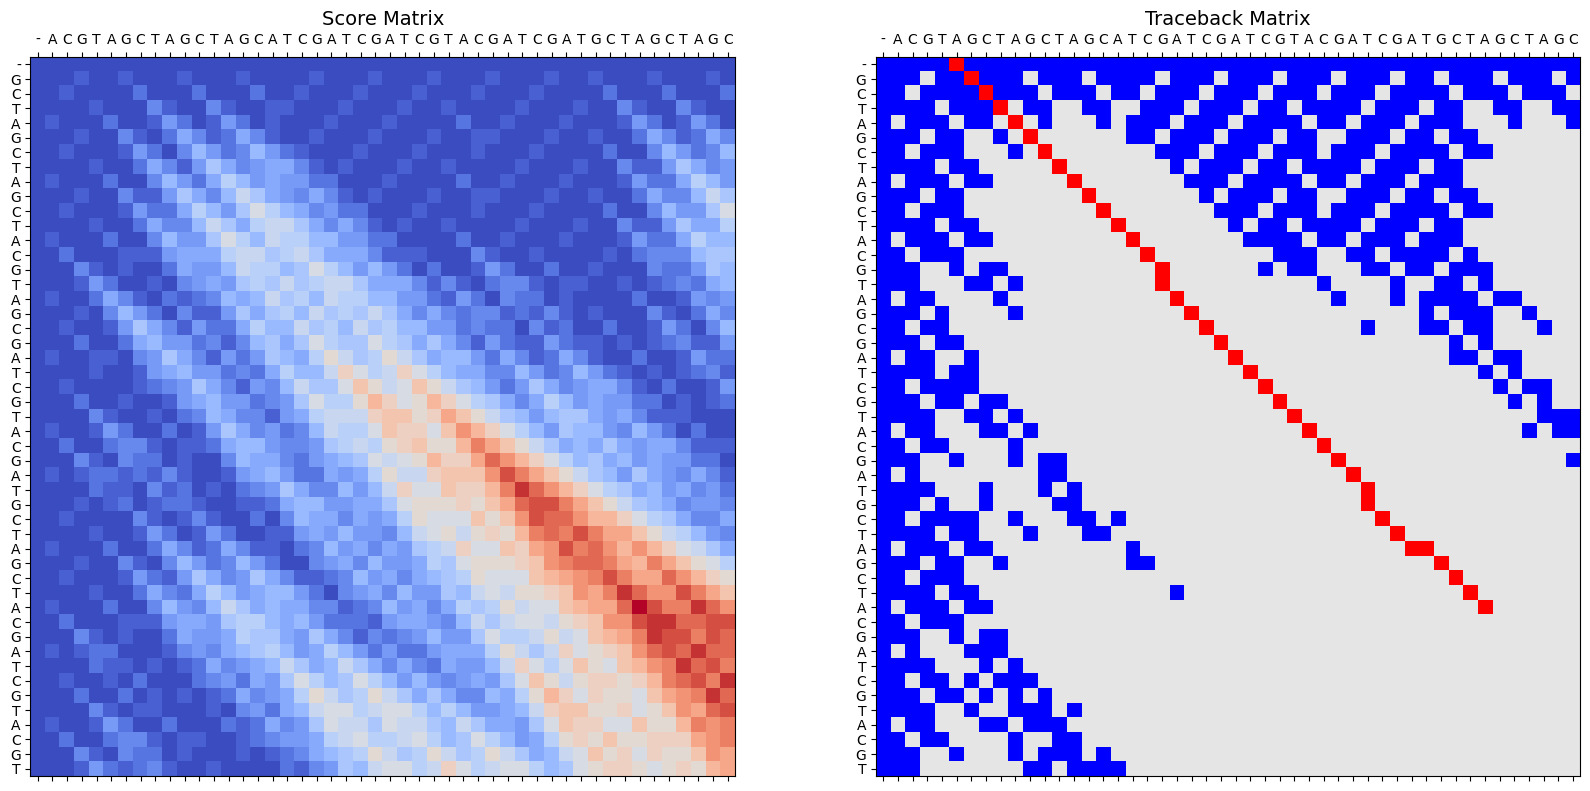

In [7]:

# Visualise the scoring matrix and the traceback path using matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].matshow(score_matrix, cmap='coolwarm')
ax[0].set_title("Score Matrix", fontsize=14)

ax[1].matshow(traceback_matrix, cmap=mymap, norm=norm)
ax[1].set_title("Traceback Matrix", fontsize=14)

for index in range(2):
    ax[index].set_xticks(np.arange(len(sequence_2) + 1))
    ax[index].set_xticklabels(["-"] + list(sequence_2))
    ax[index].set_yticks(np.arange(len(sequence_1) + 1))
    ax[index].set_yticklabels(["-"] + list(sequence_1))

print("Score =", score)
print("Sequence 1:", aligned_sequence_1)
print("Sequence 2:", aligned_sequence_2)